### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

---


# Scenario

recession period 1 - year 1980 <br>
recession period 2 - year 1981 to 1982<br>
recession period 3 - year 1991<br>
recession period 4 - year 2000 to 2001<br>
recession period 5 - year end 2007 to mid 2009<br>
recession period 6 - year 2020 -Feb to April (Covid-19 Impact)<br>

# Data Description

The dataset investigated includes the following variables:
<br>1. Date: The date of the observation.
<br>2. Recession: A binary variable indicating recession perion; 1 means it was recession, 0 means it was normal.
<br>3. Automobile_Sales: The number of vehicles sold during the period.
<br>4. GDP: The per capita GDP value in USD.
<br>5. Unemployment_Rate: The monthly unemployment rate.
<br>6. Consumer_Confidence: A synthetic index representing consumer confidence, which can impact consumer spending and automobile purchases.
<br>7. Seasonality_Weight: The weight representing the seasonality effect on automobile sales during the period.
<br>8. Price: The average vehicle price during the period.
<br>9. Advertising_Expenditure: The advertising expenditure of the company.
<br>10.Vehicle_Type: The type of vehicles sold; Supperminicar, Smallfamiliycar, Mediumfamilycar, Executivecar, Sports.
<br>11.Competition: The measure of competition in the market, such as the number of competitors or market share of major manufacturers.
<br>12.Month: Month of the observation extracted from Date..
<br>13.Year: Year of the observation extracted from Date.
<br>
By examining various factors mentioned above from the dataset, I aim to gain insights into how recessions impacted automobile sales for the company.


---


# Importing Data


In [2]:
df = pd.read_csv('data/historical_automobile_sales.csv')
print('Data read into a dataframe!')

Data read into a dataframe!


In [3]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [4]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

---


# Creating Visualizations for Data Analysis


### How automobile sales fluctuate from year to year


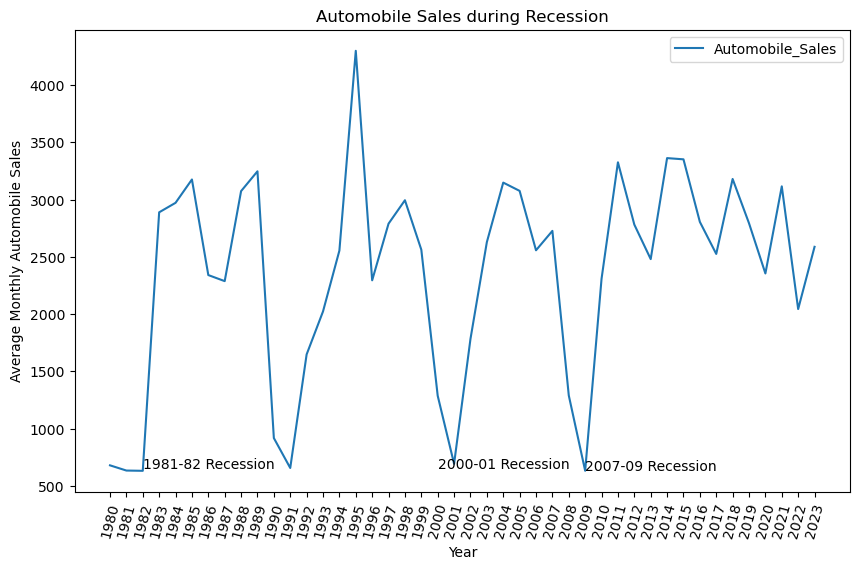

In [5]:
plt.figure(figsize=(10, 6))
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()
df_line.plot(kind = 'line')
plt.xticks(list(range(1980,2024)), rotation = 75)
plt.xlabel('Year')
plt.ylabel('Average Monthly Automobile Sales')
plt.title('Automobile Sales during Recession')
plt.text(1982, 650, '1981-82 Recession')
plt.text(2000, 650, '2000-01 Recession')
plt.text(2009, 630, '2007-09 Recession')
plt.legend()
plt.show()

---



### Is there a noticeable difference in sales trends between different vehicle types during recession periods?


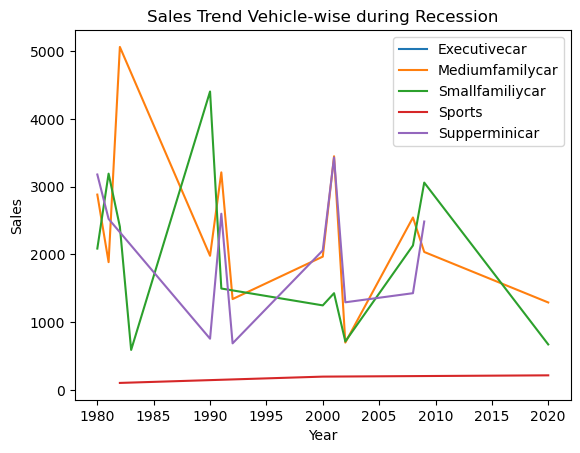

In [6]:
df_Mline = df[df.Recession ==1].groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].sum()
df_Mline.set_index('Year', inplace=True)
df_Mline = df_Mline.groupby(['Vehicle_Type'])['Automobile_Sales']
df_Mline.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Sales Trend Vehicle-wise during Recession')
plt.legend()
plt.show()

From the graph, we can see that the sale of Sports cars is extremely low compared to others, most likely because of the high cost of the vehicle. People mainly bought family cars and mini cars during this period. Executive cars were not bought at all.

----


### Compare the sales trend per vehicle type for a recession period with a non-recession period.


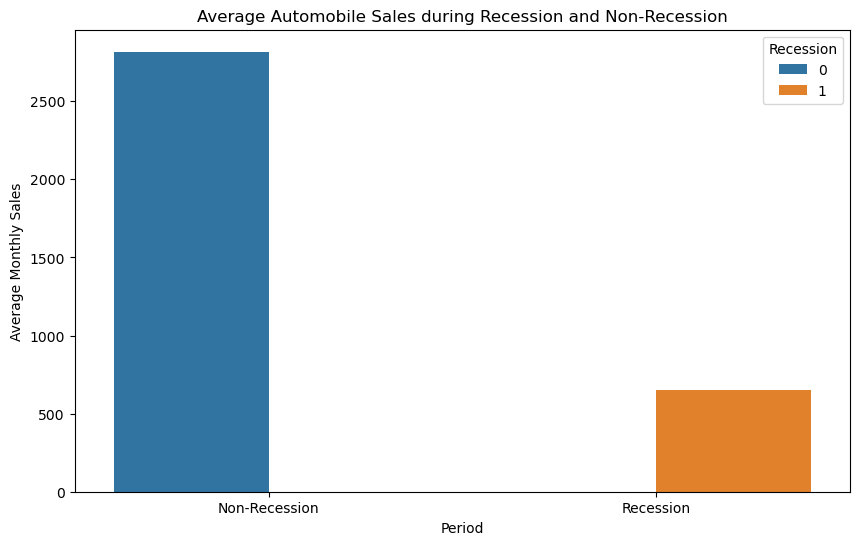

In [7]:
new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='Recession', y='Automobile_Sales', hue = 'Recession', data=new_df)
plt.xlabel('Period')
plt.ylabel('Average Monthly Sales')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show()

### Compare the sales of different vehicle types during a recession and a non-recession period


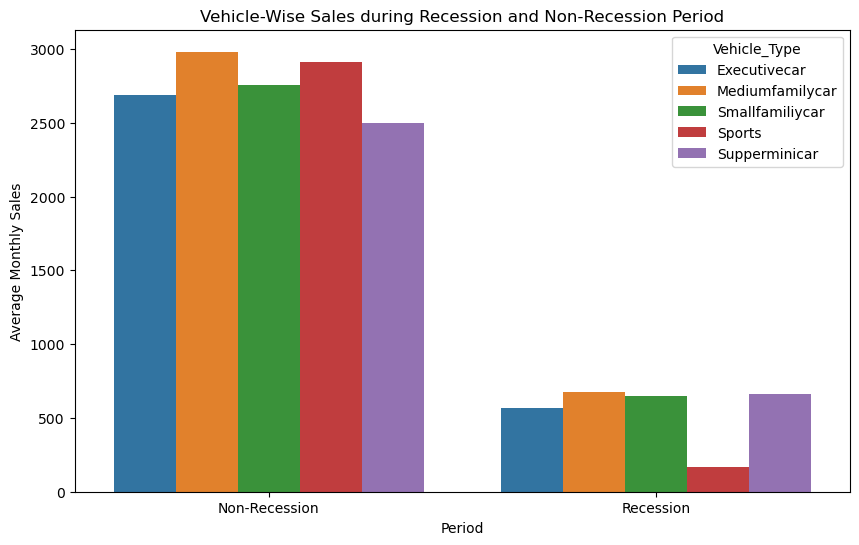

In [8]:
new_df=df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=new_df)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Period')
plt.ylabel('Average Monthly Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')

plt.show()

During Recession, the monthly sales of mobiles reduced drastically by almost 80%. Among the vehicle types, the most affected type of vehicle is executivecar and sports.

---


### Compare the variations in GDP during recession and non-recession period.


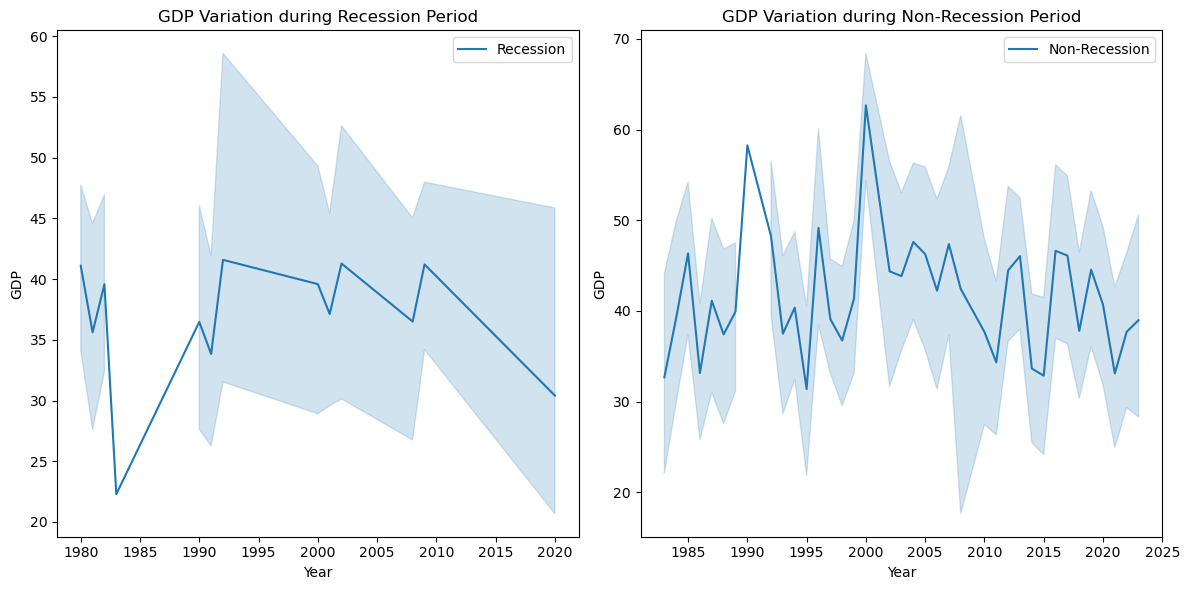

In [9]:
#Create dataframes for recession and non-recession period
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

#Figure
fig=plt.figure(figsize=(12, 6))

#Create different axes for subploting
ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). 

#plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')

#plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession',ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non-Recession Period')

plt.tight_layout()
plt.show()

From this plot, it is evident that during recession, the GDP of the country was in a low range, might have afected the overall sales of the company<br><br>

---


### Impact of seasonality on Automobile Sales

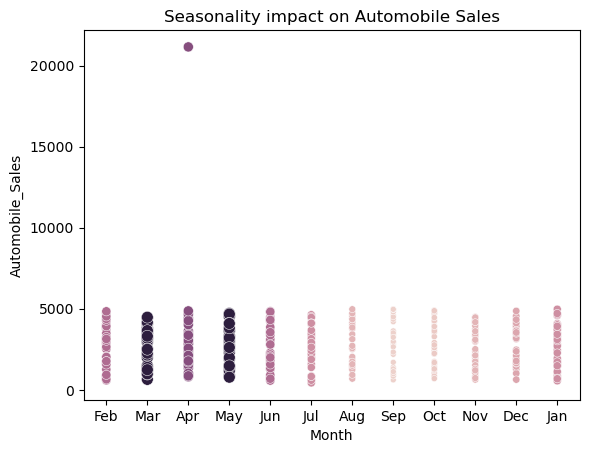

In [10]:
non_rec_data = df[df['Recession'] == 0]

size=non_rec_data['Seasonality_Weight'] #for bubble effect

sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', hue='Seasonality_Weight', legend=False, size=size)

plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality impact on Automobile Sales')

plt.show()

From this plot, it is evident that seasonality has not affected on the overall sales. However, there is a drastic raise in sales in the month of April.<br><br>

---


 ### Correlation between average vehicle price relate to the sales volume during recessions

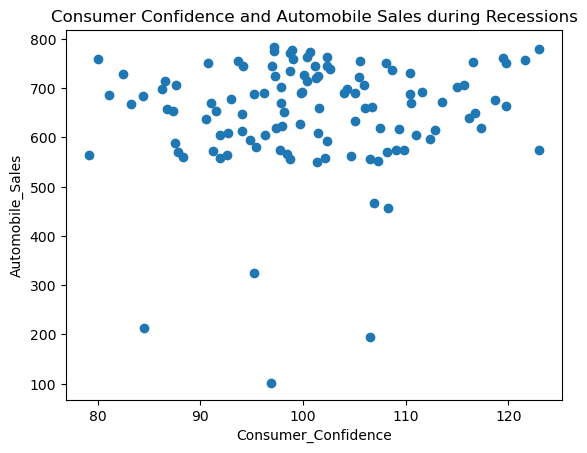

In [11]:
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])

plt.xlabel('Consumer_Confidence')
plt.ylabel('Automobile_Sales')
plt.title('Consumer Confidence and Automobile Sales during Recessions')
plt.show()


 ### Relationship between Average Vehicle Price and Sales during Recessions


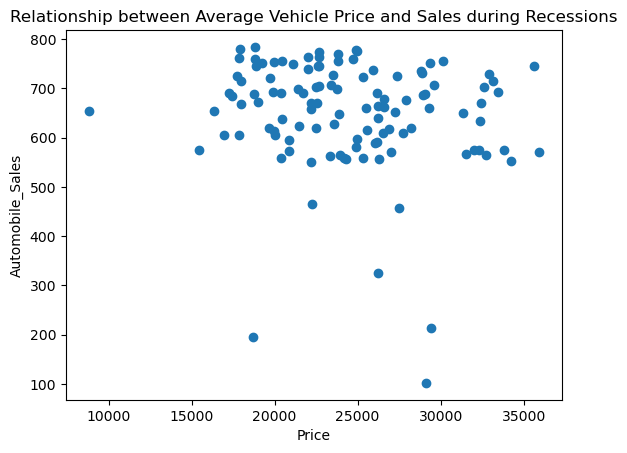

In [12]:
plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'])

plt.xlabel('Price')
plt.ylabel('Automobile_Sales')
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')
plt.show()

There is not much relation!<br><br>

----


 ### Portion of advertising expenditure of XYZAutomotives during recession and non-recession periods

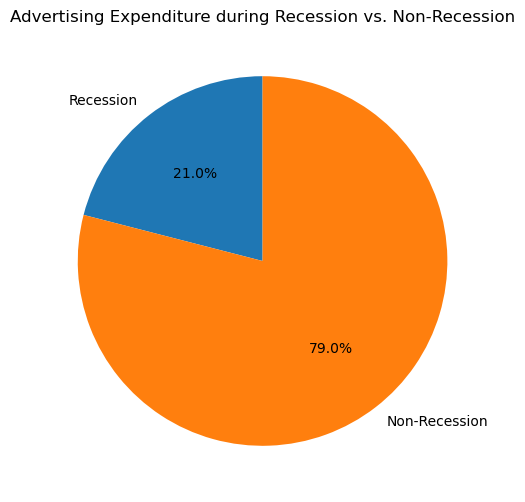

In [13]:
# Calculate the total advertising expenditure for both periods
RAtotal = rec_data['Advertising_Expenditure'].sum()
NRAtotal = non_rec_data['Advertising_Expenditure'].sum()

# Create a pie chart for the advertising expenditure 
plt.figure(figsize=(8, 6))

labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Advertising Expenditure during Recession vs. Non-Recession')

plt.show()

Much more money was spent during non-recession periods compared to recession periods (~80% vs ~20%), which is reasonable.

---


### Total Advertisement expenditure for each vehicle type during recession period

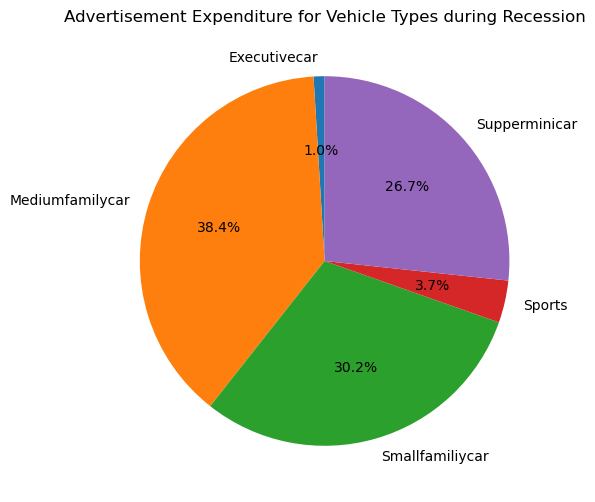

In [14]:
# Calculate the expenditures by vehicle type during recessions
VTexpenditure = rec_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Create a pie chart for the share of each vehicle type in total expenditure during recessions
plt.figure(figsize=(10, 6))

labels = VTexpenditure.index
sizes = VTexpenditure.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Advertisement Expenditure for Vehicle Types during Recession')

plt.show()

During recession the advertisements were mostly focued on low price range vehicle.

----


 ### The effect of the unemployment rate on vehicle type and sales during the Recession Period

/var/folders/1l/7rdgkfvs7h3cgjr2m2yj7ck80000gn/T/ipykernel_60658/291366965.py:1: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=rec_data, x='unemployment_rate', y='Automobile_Sales', hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)


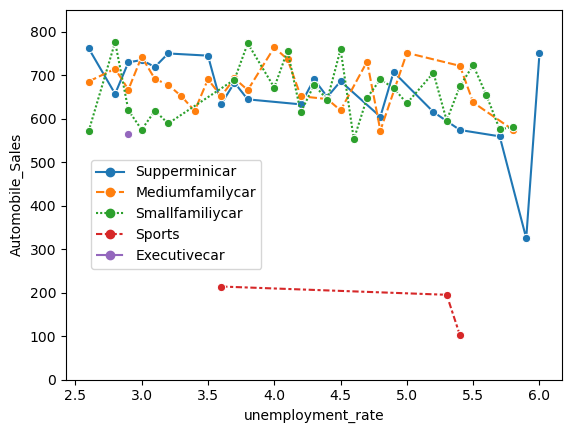

In [15]:
sns.lineplot(data=rec_data, x='unemployment_rate', y='Automobile_Sales', hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)
plt.ylim(0,850)
plt.legend(loc=(0.05,.3))

The sales of superminicar, smallfamilycar, mediumminicar were not heavily affected by unemployment rate during recession, except for a huge drop of Superminicar sales when unemployment rate reached 6..0%, but then they recover quickly right after.

---


### The highest sales region/offices of the company during recession period


In [17]:
# Calculate the total sales by city
sales_by_city = rec_data.groupby('City')['Automobile_Sales'].sum().reset_index()

# Create a base map centered on the United States
map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Create a choropleth layer using Folium
choropleth = folium.Choropleth(
    geo_data= 'data/us-states.json',  # GeoJSON file with state boundaries
    data=sales_by_city,
    columns=['City', 'Automobile_Sales'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Automobile Sales during Recession'
).add_to(map1)


# Add tooltips to the choropleth layer
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], labels=True)
)

# Display the map
map1